# Theory
The purpose of this notebook is to visualize the key concepts mentioned in the paper.

## 1. Graph signals

We represent graphs using a self desgined Python class called Graph. A Graph object must be initiliazed with an adjacency matrix (numpy array).

In [3]:
import networkx as nx
import numpy as np

In [4]:
from Graph_class import Graph

/home/lcr/Desktop/Uni/Elektrotechnik/5. Semester/Project_gsp/Graph-Signal-Processing-and-its-Applications-to-Anomaly-Detection-and-Classification/notebooks/Graph_class.py:222: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ (graph frequency)")
/home/lcr/Desktop/Uni/Elektrotechnik/5. Semester/Project_gsp/Graph-Signal-Processing-and-its-Applications-to-Anomaly-Detection-and-Classification/notebooks/Graph_class.py:223: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel("Percentage of the energy of a mode in $\%$")


For the purposes of demonstration, we picked a certain adjacency matrix (which was used for some of the plots in the report):

In [5]:
A = np.array([[0, 3, 0, 3, 0, 0, 1, 2, 2, 3, 3, 1, 1, 3, 0],
       [3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 2, 3, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

If you want to create random graphs, you can use

In [6]:
def random_graph(n_nodes=10, edge_prob=0.3, weight_range=(0.1, 1.0), seed=None, labels=False):
        if seed is not None:
            np.random.seed(seed)
        A_upper = (np.random.rand(n_nodes, n_nodes) < edge_prob) * np.random.uniform(
            weight_range[0], weight_range[1], size=(n_nodes, n_nodes)
        )
        A = np.triu(A_upper, 1)
        A = A + A.T
        np.fill_diagonal(A, 0)
        node_values = np.random.rand(n_nodes)
        return Graph(A, labels=labels), node_values

In [12]:
# G_random, node_values_random = random_graph()
# G_random.plot(node_values=node_values_random)

In [13]:
G = Graph(A)

The Graph G contains the following member variables (among others): A (adjacency matrix), D (degree matrix), L (Laplacian), L_sym (normalized Laplacian) and G (the networkx graph based on the adjacency matrix). All of these member variables are calculated using A. 
When assigning node values, the graph can also be plotted:

In [14]:

nodes = np.array([0.94220176, 0.56328822, 0.3854165 , 0.01596625, 0.23089383,
       0.24102547, 0.68326352, 0.60999666, 0.83319491, 0.17336465,
       0.39106061, 0.18223609, 0.75536141, 0.42515587, 0.20794166])

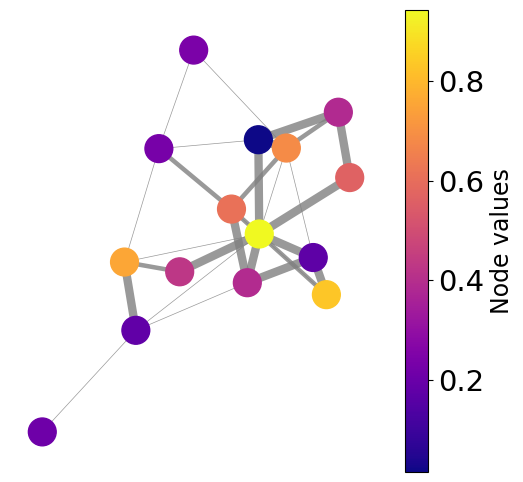

In [15]:
G.plot(node_values=nodes, node_size= 400, save_plot=False, plot_name='Example graph', show_title=False)

# 2. Graph Fourier transform (GFT)

The GFT as presented in our report can be based on different shift operators: Adjacency, Laplacian and normalized Laplacian. Independently from the choice, the GFT is based on the diagonalization of the shift operator. in the case of Laplacian and Normalized Laplacian, the eigenvalues can then be interpreted as frequencies since they are real, positive values where the magnitude corresponds to the variance in the node domain.

Using the member functions spectrum, one can obtain the eigenvalues and eigenvectors of the graph and calculate the gft using the member function gft.
In order to visualize our results, we created the member function plot_eigvecs, where one must specify which shift operator should be used:

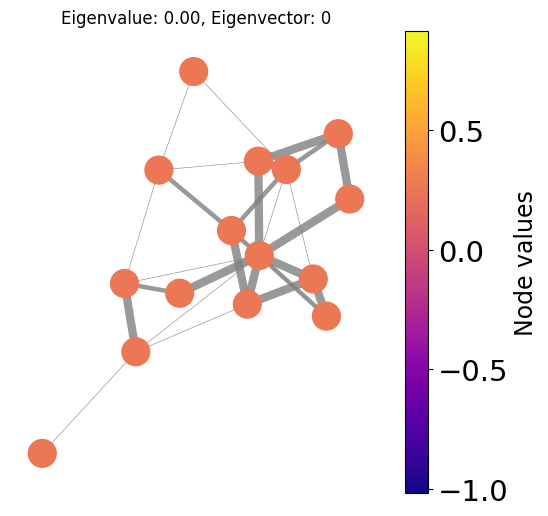

Eigenvector index: 0, Eigenvalue: 0.0


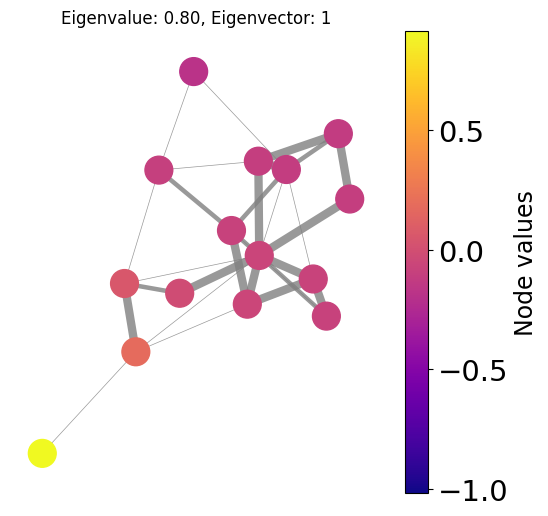

Eigenvector index: 1, Eigenvalue: 0.7981397024911933


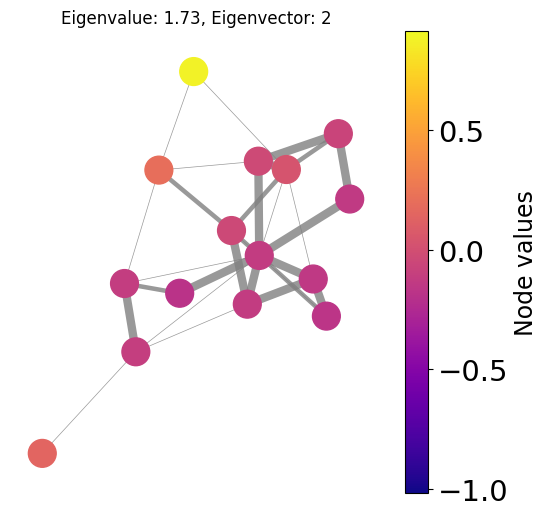

Eigenvector index: 2, Eigenvalue: 1.7345469352133633


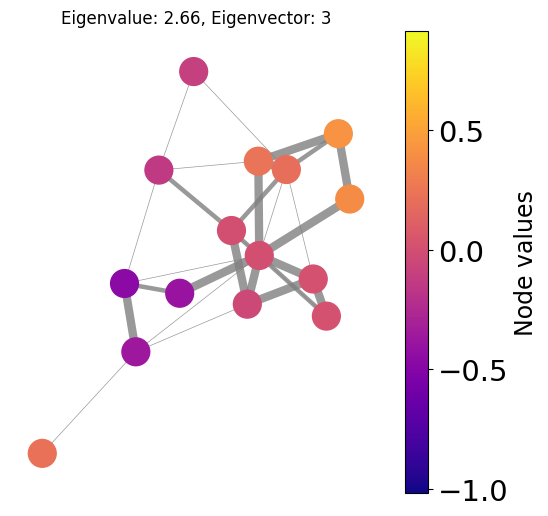

Eigenvector index: 3, Eigenvalue: 2.6590923589841933


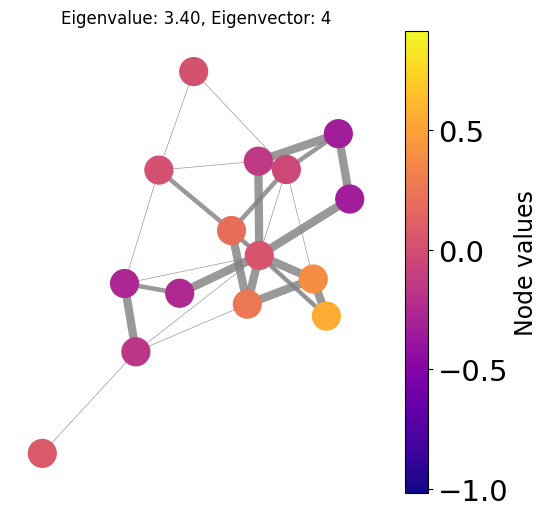

Eigenvector index: 4, Eigenvalue: 3.4004120980379646


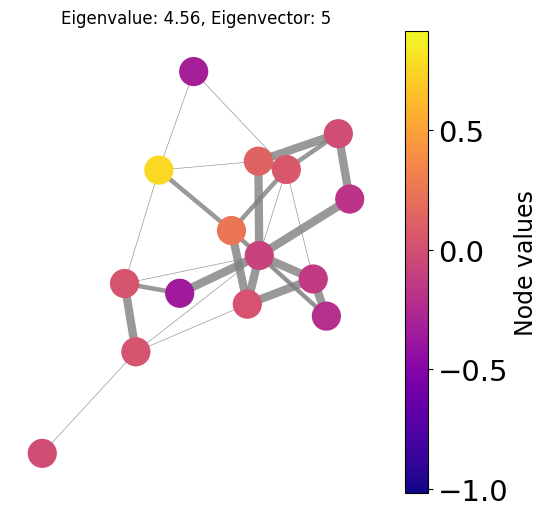

Eigenvector index: 5, Eigenvalue: 4.555797289187927


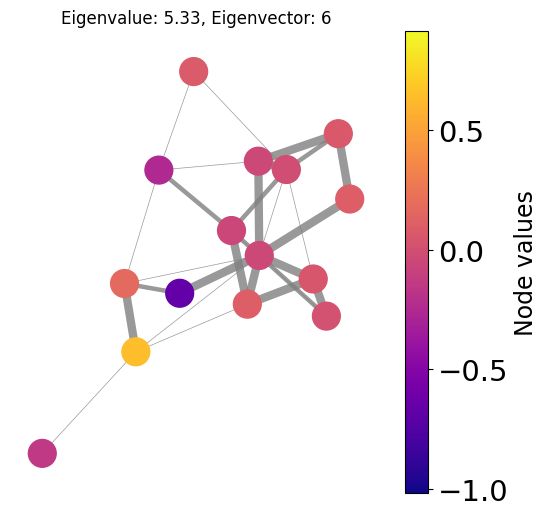

Eigenvector index: 6, Eigenvalue: 5.331334726866865


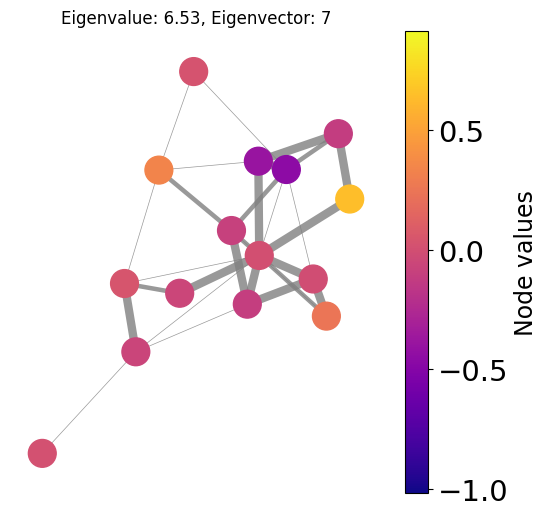

Eigenvector index: 7, Eigenvalue: 6.526511492909282


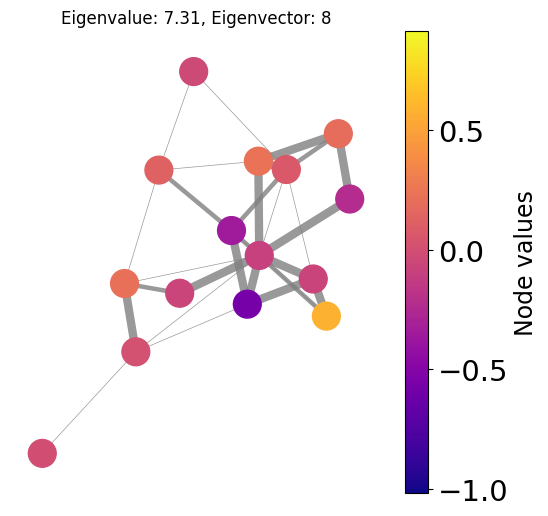

Eigenvector index: 8, Eigenvalue: 7.3074009686892865


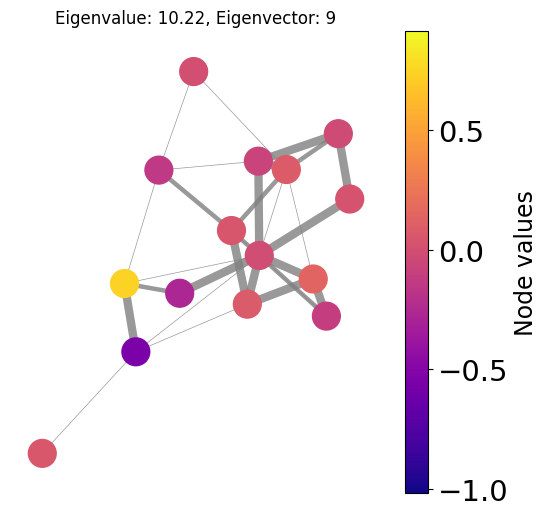

Eigenvector index: 9, Eigenvalue: 10.219654141603069


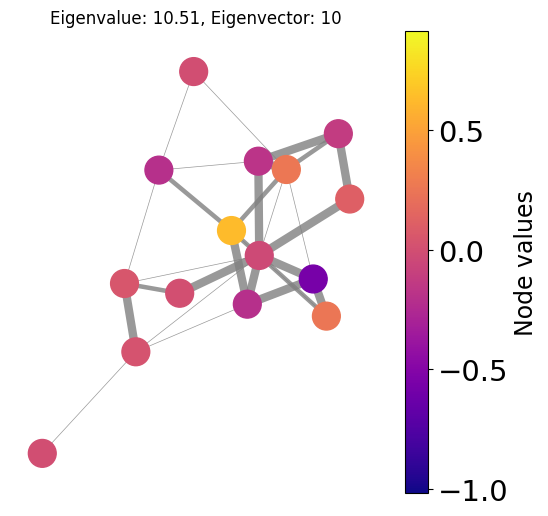

Eigenvector index: 10, Eigenvalue: 10.51379492549266


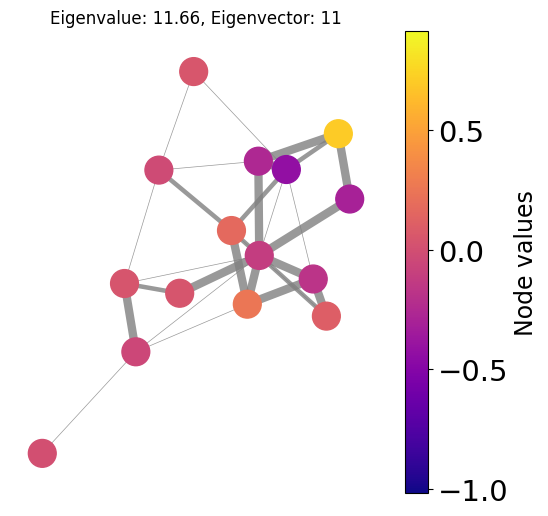

Eigenvector index: 11, Eigenvalue: 11.659514930308408


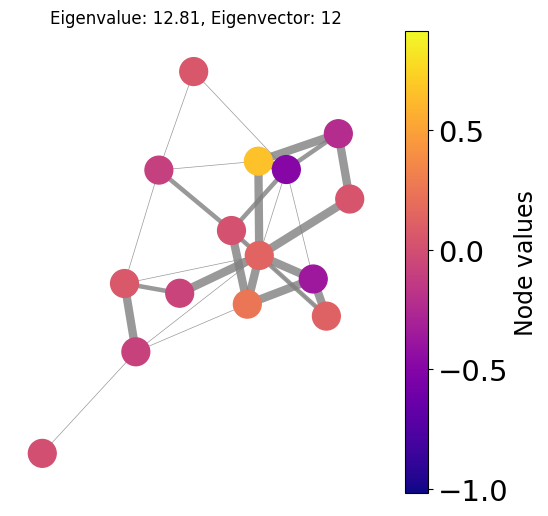

Eigenvector index: 12, Eigenvalue: 12.811227134963419


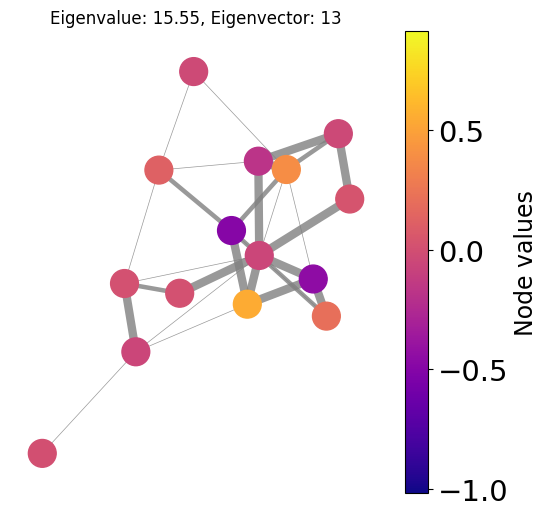

Eigenvector index: 13, Eigenvalue: 15.546797787555084


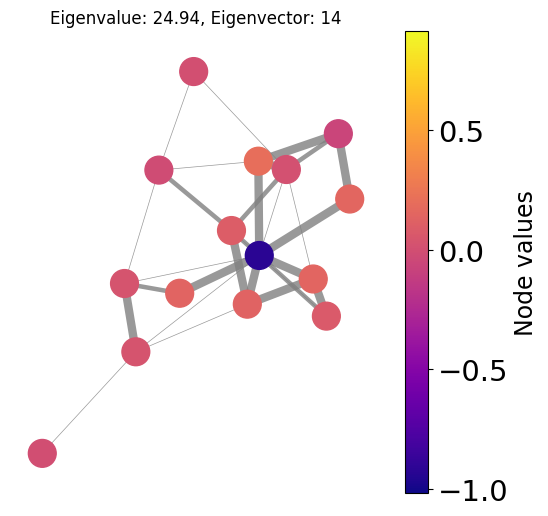

Eigenvector index: 14, Eigenvalue: 24.935775507697294


In [16]:
# Specify matrix_type to be one of the following:
# "adjacency", "laplacian", "normalized_laplacian"
G.plot_eigvecs(matrix_type="laplacian")

Moreover, one can plot how much energy each frequency contributes to the signal:

Spectral energy of first 3 modes: 0.7602336377261455


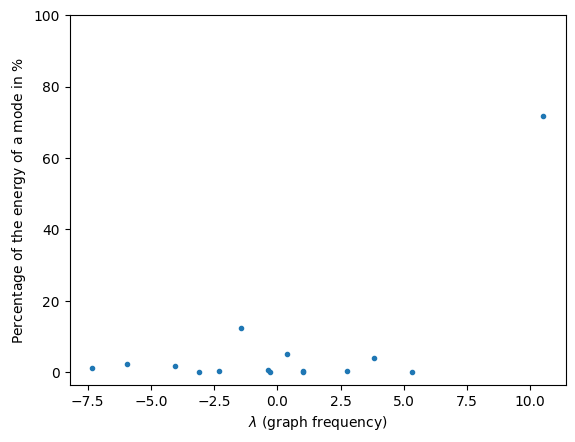

In [17]:
G.plot_spectral_energy(signal=nodes, matrix_type="adjacency")

# 2. Graph Wavelet Transform (GWT)

The GWT calculated by our code uses a wavelet taken form another paper (D. K. Hammond, P. Vandergheynst, and R. Gribonval, “Wavelets on graphs via spectral graph theory”).

In order to visualize the GWT, the code producing the plots depicted in the report are shown in the following:

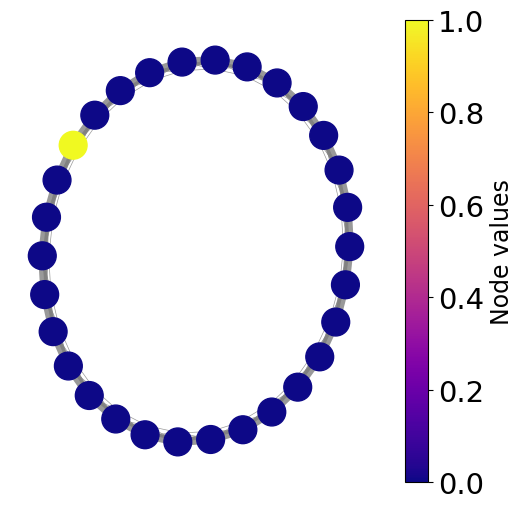

In [18]:
#wavelet example
n = 30
A1=np.zeros(shape=(n,n))
for i in range(1,4):
    A1+=np.diag(1/i*np.ones(n-i),-i)+np.diag(1/i*np.ones(n-i),i)+np.diag(1/i*np.ones(i),-n+i)+np.diag(1/i*np.ones(i),n-i)

x= np.zeros(n)
x[0]=1

G1=Graph(A1, labels=None)
G1.plot(x,node_size=400,save_plot=False)


wavelet-spectrum-0,[-0.06275894  0.06375249  0.06375249  0.07018332  0.07018332  0.0752754 ]


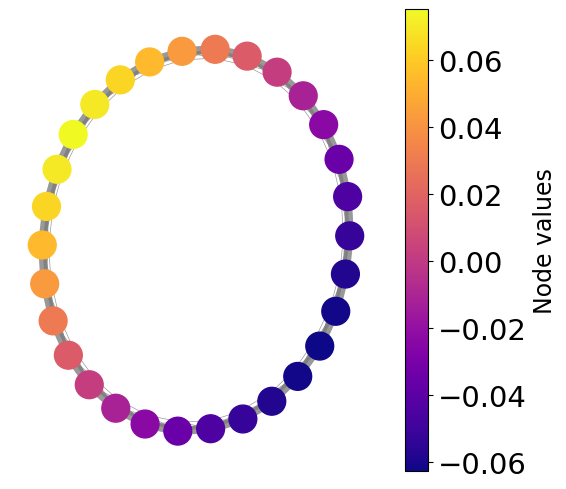

wavelet-spectrum-1,[-0.07554766  0.08664578  0.08664578  0.09805285  0.09805285  0.10992185]


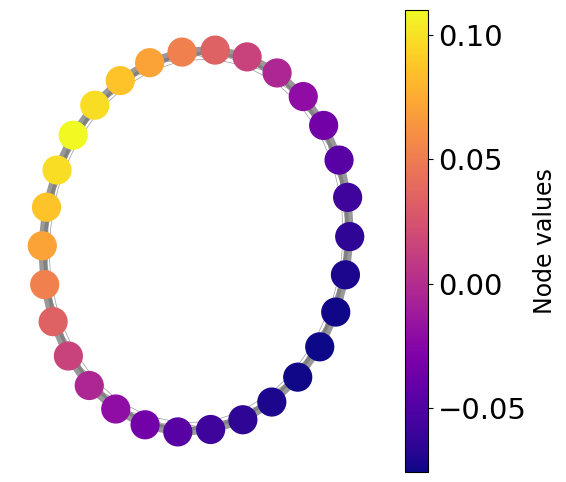

wavelet-spectrum-2,[-0.0340861   0.05379098  0.05379098  0.07209497  0.07209497  0.10028569]


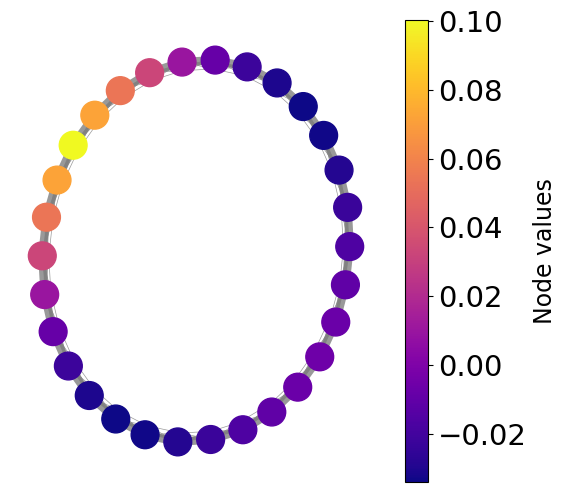

wavelet-spectrum-3,[-0.07849889 -0.08265406 -0.08265406  0.10545527  0.10545527  0.18007439]


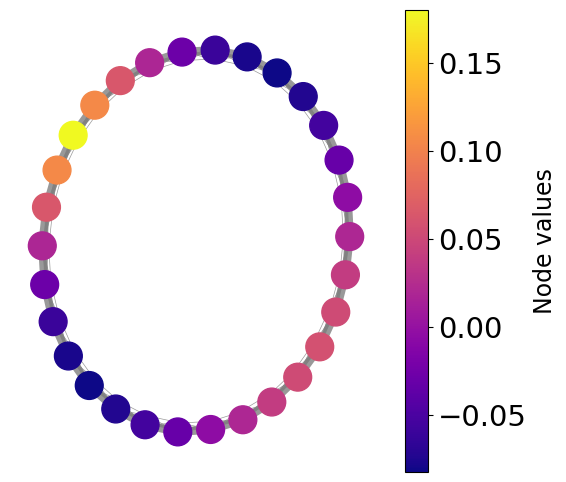

wavelet-spectrum-4,[-0.08428283 -0.09488705 -0.09488705  0.10064918  0.10064918  0.2898629 ]


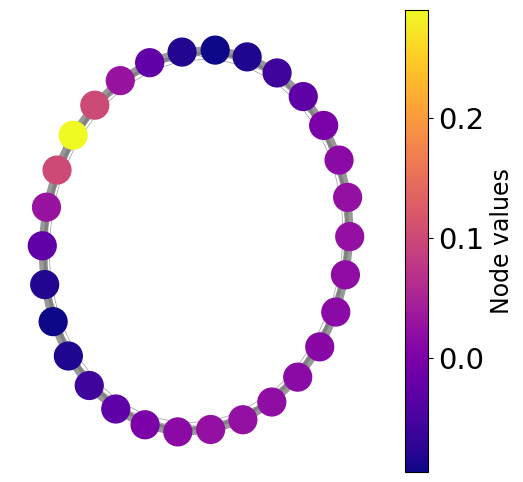

wavelet-spectrum-5,[-0.09107534 -0.09950884 -0.09950884 -0.13779637 -0.13779637  0.53068461]


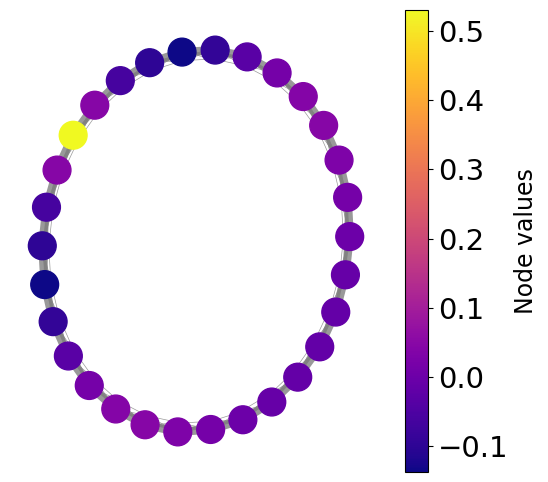

wavelet-spectrum-6,[-0.10010651 -0.19479585 -0.19479585 -0.21881233 -0.21881233  0.97971176]


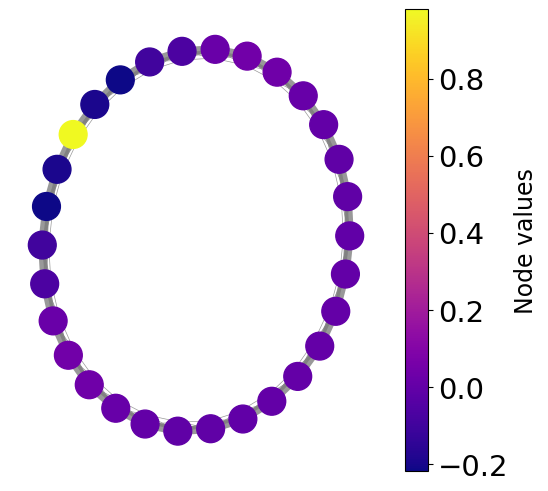

In [20]:
G1.plot_wavelet_spectrum(x,nodesize= 400, ns=7)